•	Load Dataset:

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/MFG10YearTerminationData.csv')

# Display the first few rows of the dataset
print(data.head())


   EmployeeID   recorddate_key birthdate_key orighiredate_key  \
0        1318  12/31/2006 0:00      1/3/1954        8/28/1989   
1        1318  12/31/2007 0:00      1/3/1954        8/28/1989   
2        1318  12/31/2008 0:00      1/3/1954        8/28/1989   
3        1318  12/31/2009 0:00      1/3/1954        8/28/1989   
4        1318  12/31/2010 0:00      1/3/1954        8/28/1989   

  terminationdate_key  age  length_of_service  city_name department_name  \
0            1/1/1900   52                 17  Vancouver       Executive   
1            1/1/1900   53                 18  Vancouver       Executive   
2            1/1/1900   54                 19  Vancouver       Executive   
3            1/1/1900   55                 20  Vancouver       Executive   
4            1/1/1900   56                 21  Vancouver       Executive   

  job_title  store_name gender_short gender_full termreason_desc  \
0       CEO          35            M        Male  Not Applicable   
1       CEO     

- Display Column Names


In [6]:
# Display column names
print(data.columns)


Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')


- Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling missing values if any
data = data.dropna()

# Convert the date column to datetime format
data['terminationdate_key'] = pd.to_datetime(data['terminationdate_key'])

# Extract year, month, and day from the date
data['year'] = data['terminationdate_key'].dt.year
data['month'] = data['terminationdate_key'].dt.month
data['day'] = data['terminationdate_key'].dt.day

# Drop the original date column
data = data.drop(columns=['terminationdate_key'])

# Encoding categorical variables
label_encoder = LabelEncoder()
data['target_column'] = label_encoder.fit_transform(data['STATUS'])

# Encode other categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Splitting features and target
X = data.drop(columns=['target_column'])
y = data['target_column']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


- Build and Train the Deep Learning Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; use 'softmax' for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
994/994 [==============================] - 4s 3ms/step - loss: 0.0428 - accuracy: 0.9922 - val_loss: 5.4525e-04 - val_accuracy: 1.0000
Epoch 2/50
994/994 [==============================] - 2s 2ms/step - loss: 2.2855e-04 - accuracy: 1.0000 - val_loss: 1.0495e-04 - val_accuracy: 1.0000
Epoch 3/50
994/994 [==============================] - 2s 2ms/step - loss: 6.0846e-05 - accuracy: 1.0000 - val_loss: 3.8978e-05 - val_accuracy: 1.0000
Epoch 4/50
994/994 [==============================] - 3s 3ms/step - loss: 2.4666e-05 - accuracy: 1.0000 - val_loss: 1.7863e-05 - val_accuracy: 1.0000
Epoch 5/50
994/994 [==============================] - 3s 3ms/step - loss: 1.1676e-05 - accuracy: 1.0000 - val_loss: 8.9641e-06 - val_accuracy: 1.0000
Epoch 6/50
994/994 [==============================] - 3s 3ms/step - loss: 5.9644e-06 - accuracy: 1.0000 - val_loss: 4.7266e-06 - val_accuracy: 1.0000
Epoch 7/50
994/994 [==============================] - 2s 2ms/step - loss: 3.1863e-06 - accuracy: 1.0000 

- Evaluate the Model

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


311/311 [==============================] - 0s 1ms/step - loss: 5.0195e-11 - accuracy: 1.0000
Test Accuracy: 1.00


- Visualizing Training History

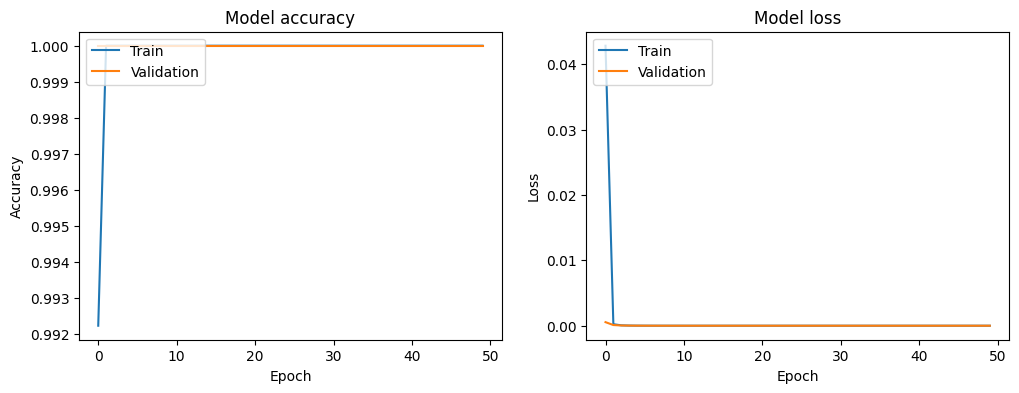

In [14]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


- Visualizing Confusion Matrix

311/311 [==============================] - 0s 1ms/step


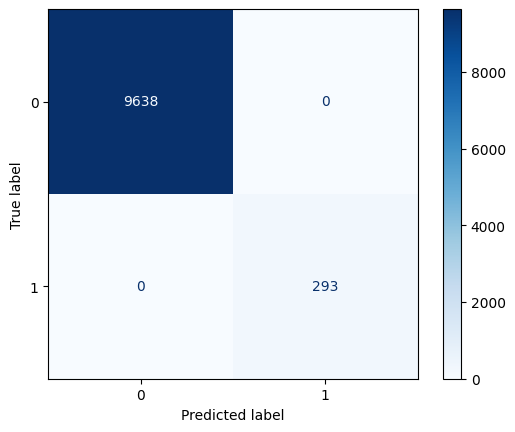

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting the labels on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()
